<a href="https://colab.research.google.com/github/MoliseMG/Tutorials/blob/master/solution2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

## Problem Statement

Predict the likelihood of **Stroke** happening to a patient using patient examination results.

## Reading Data

### Train data

In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/MoliseMG/AV-datasets/master/train_ajEneEa.csv?token=AJNTKLLKQNI2KF3M4ALKXVS6ZN6CE')
print('Dataset size: ', train_df.shape)
train_df.head()

Dataset size:  (43400, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Test Data

In [5]:
test_df = pd.read_csv('https://raw.githubusercontent.com/MoliseMG/AV-datasets/master/test_6A7bQyC.csv?token=AJNTKLOEUOUGDGIYCBKGZBK6ZN6GO')
print('Dataset size: ', test_df.shape)
test_df.head()

Dataset size:  (18601, 11)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


## Variable Identification

| Variable | Defination |
|---------|------------|
| age | Age of Patient|
| id | Patient ID |
| gender | Gender of Patient |
| hypertension |  0 - no hypertension, 1 - suffering from hypertension |
| heart_disease | 0 - no heart disease, 1 - suffering from heart disease |
| ever_married| Yes/No |
| work_type | Type of occupation |
| Residence_type |  Area type of residence (Urban/ Rural) |
| avg_glucose_level | Average Glucose level (measured after meal)|
| bmi | Body mass index |
| smoking_status | patient's smoking status |
| stroke | (Target) 0 - no stroke, 1 - suffered stroke |

**Independent Variables** : age, id,gender, hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi
**Dependent Variables**: stroke

### Identifying Categorical & Continuous Variables


In [0]:
train_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**Categoriacal features**: gender, ever_married, work_type,Residence_type,smoking_status<br>
**Continuous Variables**: id, age,hypertension,heart_disease,avg_glocuse_level,bmi,stroke

## Univariate Data Analysis


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7bba2f208>,
      dtype=object)

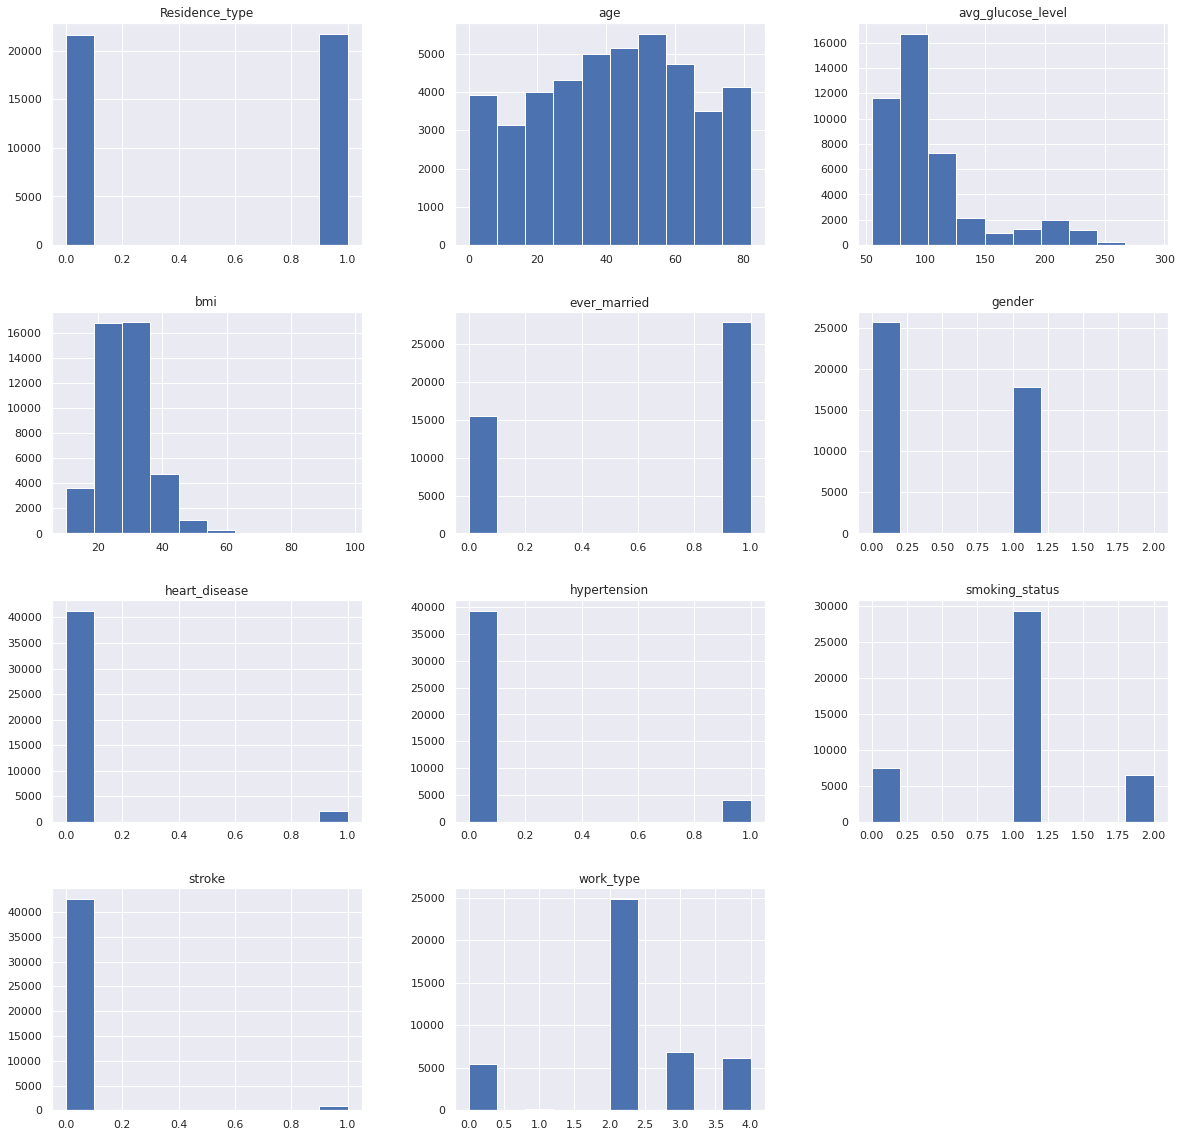

In [48]:
train_df.hist(figsize=(20,20))

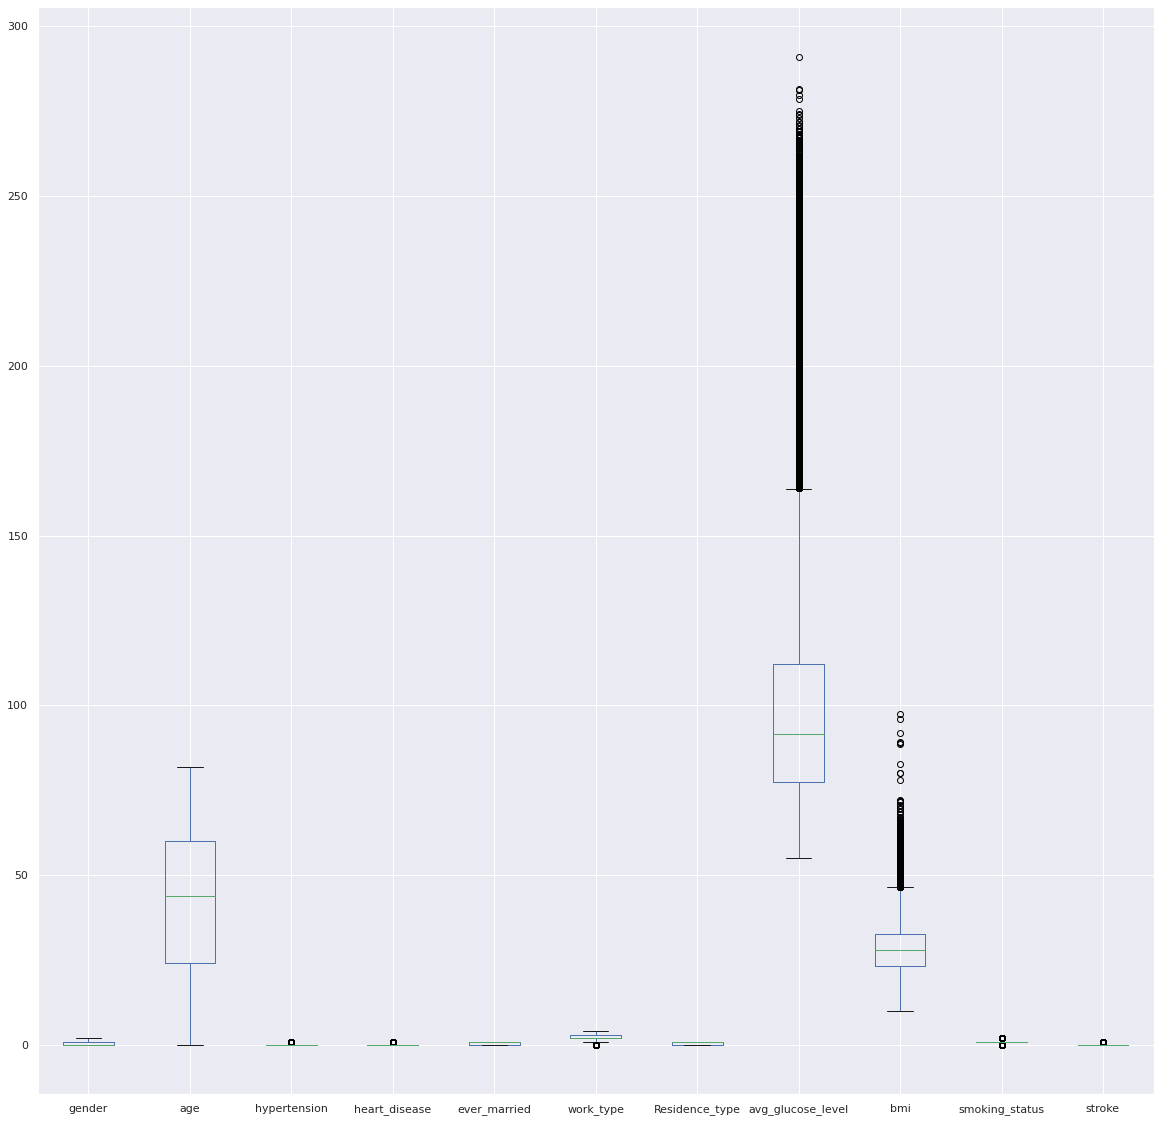

In [49]:
train_df.plot.box(figsize=(20,20))

**Observations**<br>

a) Id changes for each sample. It has to be deleted.

In [0]:
train_df.drop(columns=['id'],inplace=True)
test_df.drop(columns=['id'],inplace=True)

## Bivariate Analysis

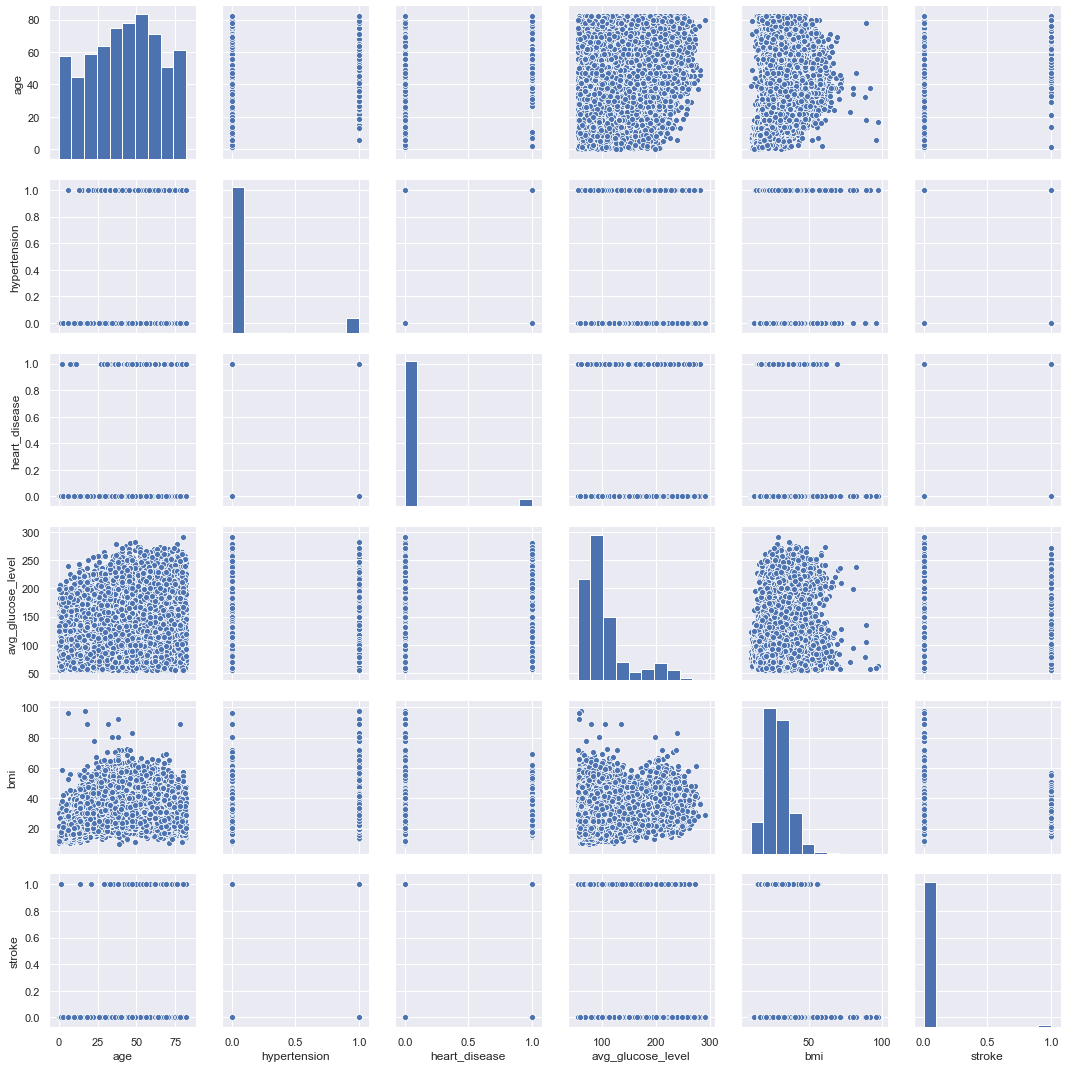

In [0]:
sns.pairplot(data=train_df)

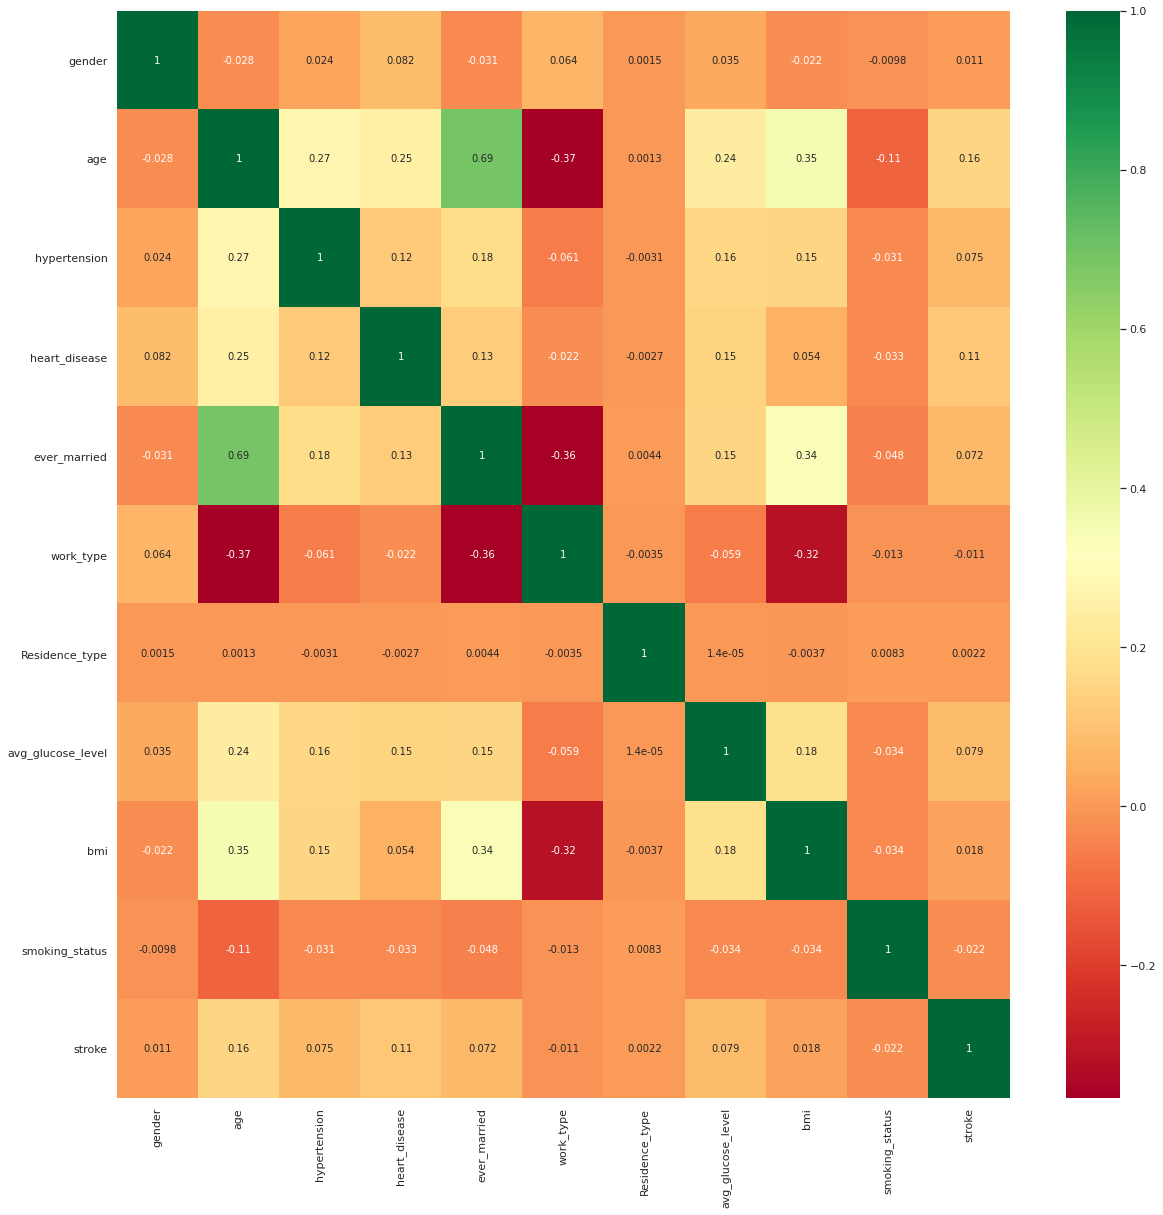

In [50]:
corr = train_df.corr()
features = corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(train_df[features].corr(),annot=True,cmap="RdYlGn")

## Missing value treatment

In [8]:
#missing values for train set
train_df.isnull().sum()/train_df.shape[0]*100

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [9]:
#missing values for test set
test_df.isnull().sum()/test_df.shape[0]*100

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.177249
smoking_status       30.917693
dtype: float64

In the dataset **bmi** and **smoking_status** have missing values.BMI is a continuous data point so the mean will be used to fill the missing values. smoking_status on the other hand is a categorical variable. The mode will be used to fill the missing variable.

In [0]:
#filling missing values for train set
train_df['bmi'].fillna(train_df['bmi'].mean(),inplace=True)
train_df['smoking_status'].fillna(train_df['smoking_status'].mode()[0],inplace=True)

In [0]:
#filling missing values for test set
test_df['bmi'].fillna(test_df['bmi'].mean(),inplace=True)
test_df['smoking_status'].fillna(test_df['smoking_status'].mode()[0],inplace=True)

## Outlier Treatment

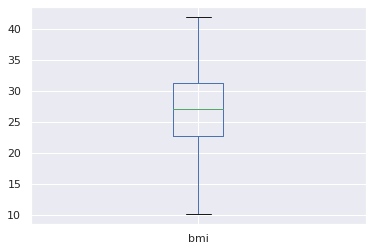

In [53]:
train_df = train_df.loc[train_df['bmi']<42]
train_df['bmi'].plot.box()

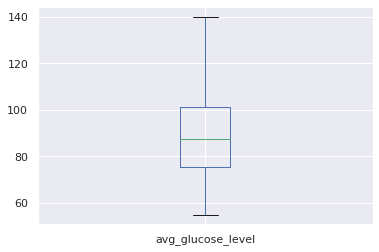

In [57]:
train_df = train_df.loc[train_df['avg_glucose_level']<140]
train_df['avg_glucose_level'].plot.box()


## Encode Categorical features

In [0]:
from sklearn import preprocessing

labeler = preprocessing.LabelEncoder()

for i in train_df.columns:
    if isinstance(train_df[i][0],str):
        train_df[i] = labeler.fit_transform(train_df[i])
        
for i in test_df.columns:
    if isinstance(test_df[i][0],str):
        test_df[i] = labeler.fit_transform(test_df[i])

In [0]:
train_y = train_df['stroke']
train_X = train_df.drop(columns=['stroke'])

test_X = test_df

In [16]:
!pip install imblearn

In [0]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [61]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(train_X, train_y)

RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')

In [62]:
X_resampled, y_resampled = ros.fit_resample(train_X, train_y)
np.unique(y_resampled, return_counts=True)

(array([0, 1]), array([34975, 34975]))

In [0]:
scaler = preprocessing.MinMaxScaler()
scaled_train=scaler.fit_transform(X_resampled)
scaled_test = scaler.fit_transform(test_X)

## Implementing a Logistic Regression##



In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(scaled_train,y_resampled)
lr.score(scaled_train,y_resampled)

0.7775839885632595

In [0]:
sub_df = pd.read_csv('https://raw.githubusercontent.com/MoliseMG/AV-datasets/master/sample_submission_edb3Rsw.csv?token=AJNTKLMV36TBYMF352BJBBC6ZORAG')

In [0]:
predictions = lr.predict(scaled_test)

sub = sub_df.to_numpy()
#sub[:,1].map(lambda x: 1 if x>0.5 else 0)

for i,j in enumerate(predictions):
    sub[i,1] = j
    
pd.DataFrame(sub).to_csv("file.csv",header=['id','stroke'],index=False)

In [45]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(predictions,sub[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13685
           1       1.00      1.00      1.00      4916

    accuracy                           1.00     18601
   macro avg       1.00      1.00      1.00     18601
weighted avg       1.00      1.00      1.00     18601



##Implementing a KNN Classifier##

In [80]:
from sklearn.neighbors import KNeighborsClassifier as KNN

clf = KNN(n_neighbors = 1)

# Fitting the model
clf.fit(scaled_train,y_resampled)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(scaled_test)

print(classification_report(test_predict,sub[:,1]))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     18356
           1       0.04      0.90      0.08       245

    accuracy                           0.73     18601
   macro avg       0.52      0.81      0.46     18601
weighted avg       0.99      0.73      0.83     18601



In [0]:
pd.DataFrame(sub).to_csv("knn_file.csv",header=['id','stroke'],index=False)

In [76]:
scaled_train

array([[0.5       , 0.03564453, 0.        , ..., 0.47205554, 0.24842767,
        0.5       ],
       [0.5       , 0.70703125, 1.        , ..., 0.38781033, 0.91509434,
        0.5       ],
       [0.        , 0.09667969, 0.        , ..., 0.65760678, 0.23584906,
        0.5       ],
       ...,
       [0.        , 0.98779297, 0.        , ..., 0.27885634, 0.29245283,
        0.5       ],
       [0.5       , 0.96337891, 0.        , ..., 0.34121661, 0.52830189,
        0.        ],
       [0.        , 0.95117188, 1.        , ..., 0.88881045, 0.31446541,
        0.5       ]])